# Internship Task

- Name: Kalpesh Nikumbh
- Email : kalpeshnikumbh811@gmail.com

## Business Context
This case requires trainees to develop a model for predicting fraudulent transactions for a 
financial company and use insights from the model to develop an actionable plan. Data for the 
case is available in CSV format having 6362620 rows and 10 columns.
Candidates can use whatever method they wish to develop their machine learning model. 
Following usual model development procedures, the model would be estimated on the 
calibration data and tested on the validation data. This case requires both statistical analysis and 
creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the 
results of your machine learning model.


## Candidate Expectations
Your task is to execute the process for proactive detection of fraud while answering following 
questions.
1. Data cleaning including missing values, outliers and multi-collinearity. 
2. Describe your fraud detection model in elaboration. 
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools. 
5. What are the key factors that predict fraudulent customer? 
6. Do these factors make sense? If yes, How? If not, How not? 
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?

# Dataset Columns:
1. step:
- Definition: Maps a unit of time in the real world.
- Interpretation: Each step represents 1 hour, and there are 744 steps in the simulation (30 days).

2. type:

- Definition: Describes the type of transaction (CASH-IN, CASH-OUT, DEBIT, PAYMENT, TRANSFER).
- Interpretation: Differentiates the nature of financial activities.
3. amount:

- Definition: Amount of the transaction in local currency.
- Interpretation: Represents the monetary value associated with each transaction.
4. nameOrig:

- Definition: Customer who initiated the transaction.
- Interpretation: Identifies the originator of the financial activity.
5. oldbalanceOrg:

- Definition: Initial balance before the transaction for the originator.
- Interpretation: Captures the account balance before the transaction occurs.
6. newbalanceOrig:

- - Definition: New balance after the transaction for the originator.
- Interpretation: Reflects the updated account balance after the transaction.
7. nameDest:

- Definition: Customer who is the recipient of the transaction.
- Interpretation: Identifies the destination or recipient of the funds.
8. oldbalanceDest:

- Definition: Initial balance before the transaction for the recipient.
- Interpretation: Captures the recipient's account balance before the transaction.
9. newbalanceDest:

- Definition: New balance after the transaction for the recipient.
- Interpretation: Reflects the updated account balance of the recipient after the transaction.
10. isFraud:

- Definition: Indicates whether the transaction is fraudulent (binary, 1 for fraud, 0 for non-fraud).
- Interpretation: Identifies transactions involving fraudulent behavior.
11. isFlaggedFraud:
- Definition: Flags illegal attempts based on a business rule (binary, 1 if flagged, 0 if not flagged).
- Interpretation: Marks transactions attempting to transfer more than 200,000 in a single transaction as potentially illegal.

In [1]:
# Importing require Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Downloads/Fraud.csv")

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
# Examine structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# checking missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [8]:
df['step_datetime'] = pd.to_datetime(df['step'], unit='h')

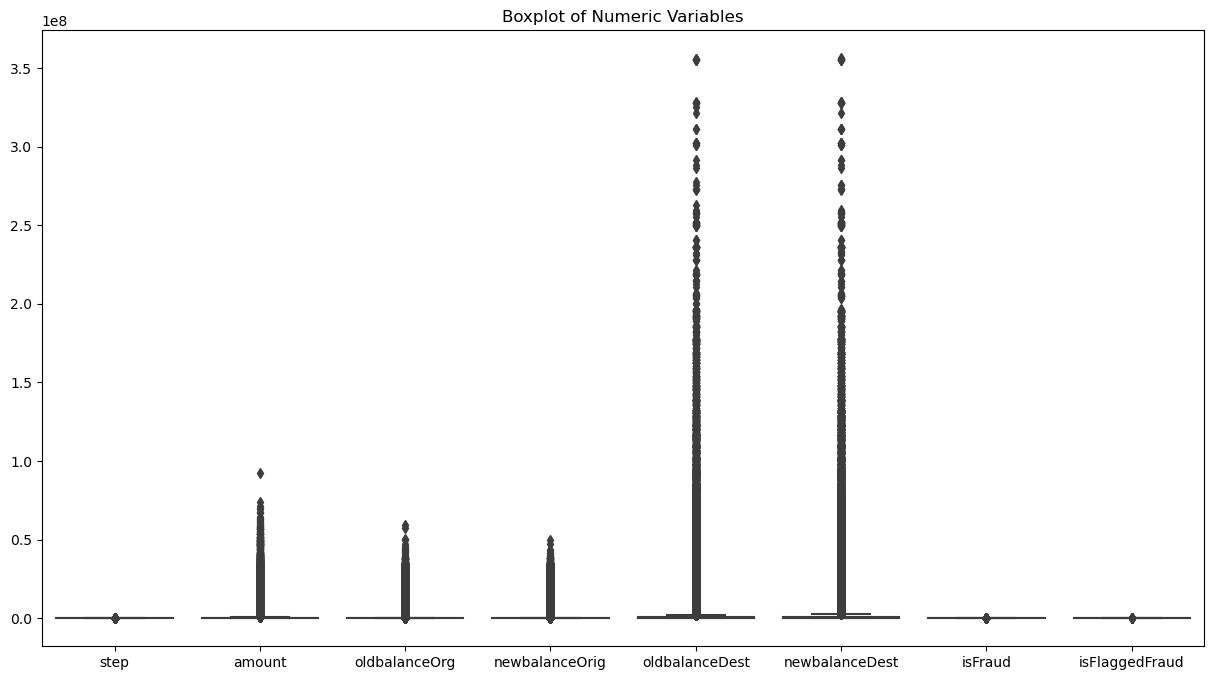

In [9]:
# To Identify numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Visualize boxplots to identify outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplot of Numeric Variables')
plt.show()


In [10]:
# Handle outliers Using z-score to remove outliers
from scipy.stats import zscore
z_scores = zscore(df[numeric_columns])
df_no_outliers = df[(z_scores < 3).all(axis=1)]


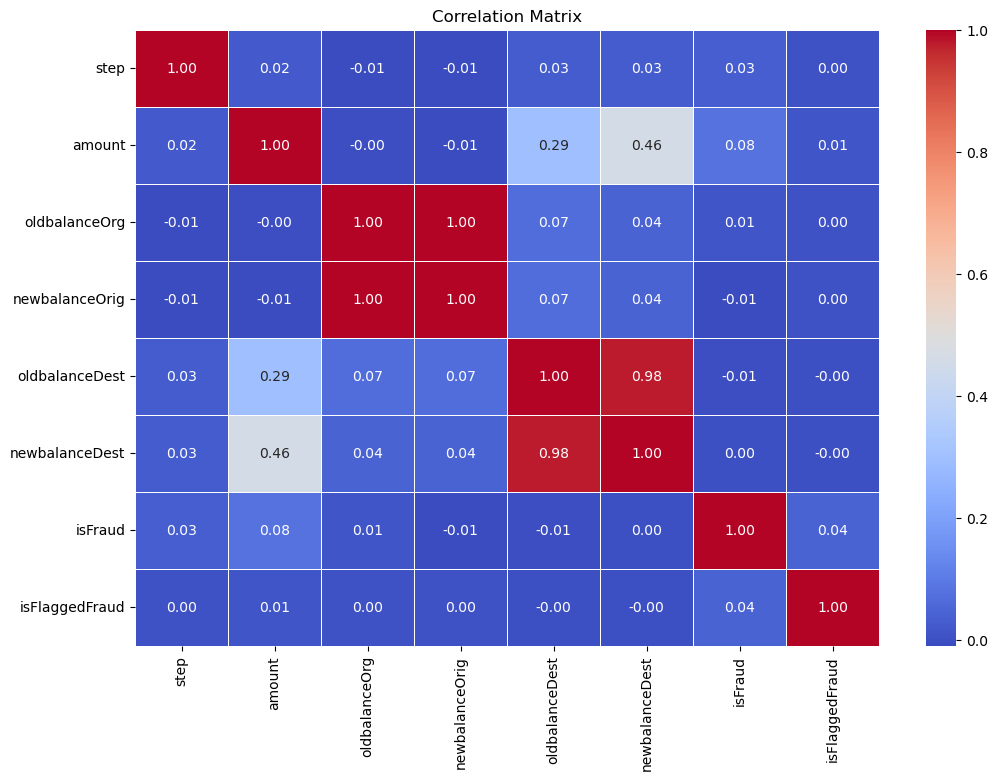

In [11]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Check correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


 - oldbalancedest and amount (0.29): Moderate positive correlation indicates some relationship between the initial destination balance and transaction amount.

- newbalancedest and amount (0.46): A stronger positive correlation implies that the new destination balance is influenced by the transaction amount.

- newbalancedest and oldbalancedest (0.98): Extremely high correlation suggests redundancy; consider dropping one to address multicollinearity.

- newbalanceorig and oldbalanceorig (1): Perfect correlation implies identical values, indicating redundancy; one variable may be redundant for modeling.

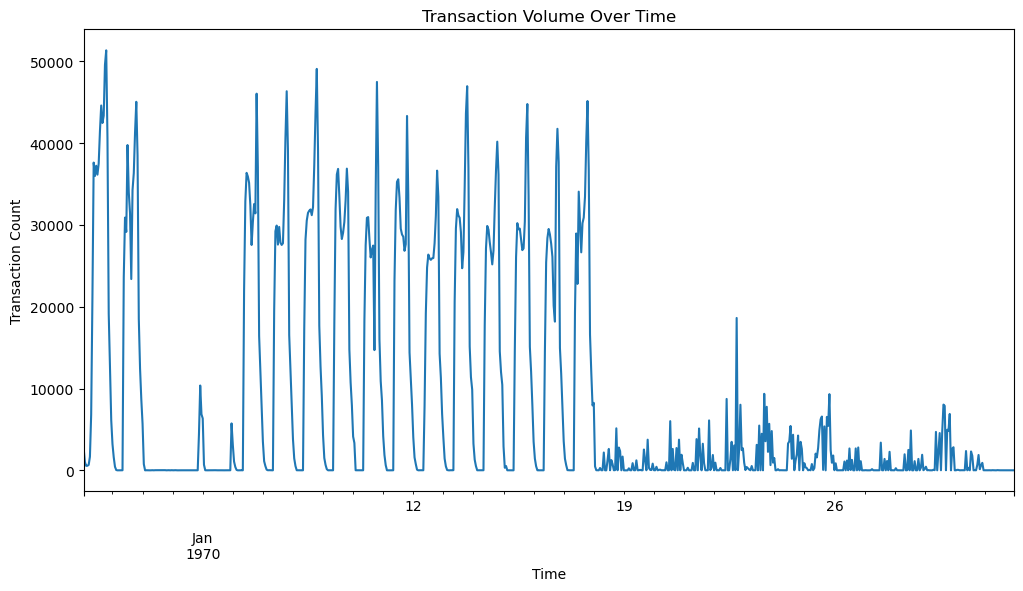

In [12]:
# Transaction volume over time
plt.figure(figsize=(12, 6))
df.groupby('step_datetime')['amount'].count().plot(title='Transaction Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Transaction Count')
plt.show()

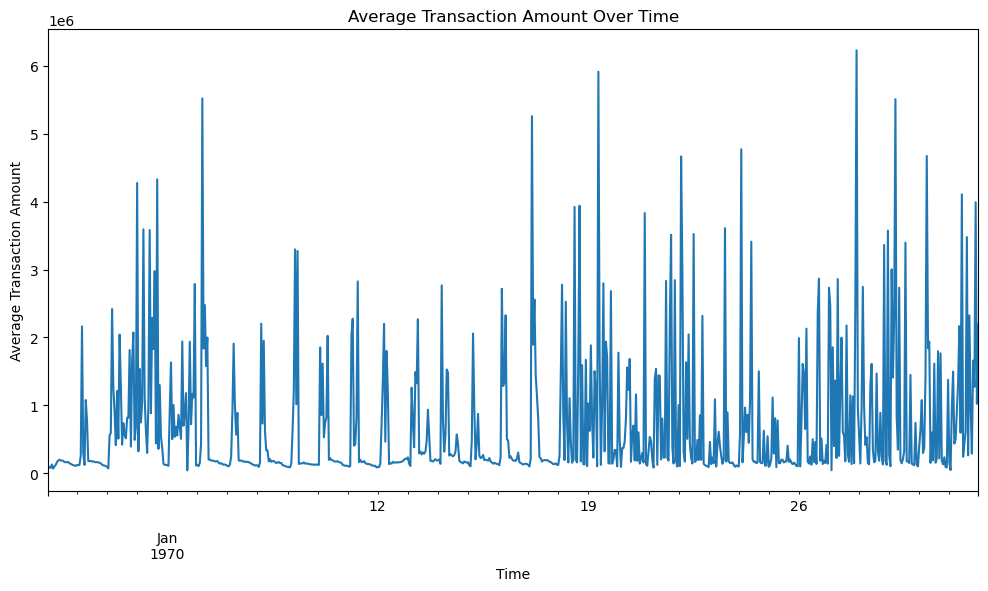

In [13]:
# Average transaction amount over time
plt.figure(figsize=(12, 6))
df.groupby('step_datetime')['amount'].mean().plot(title='Average Transaction Amount Over Time')
plt.xlabel('Time')
plt.ylabel('Average Transaction Amount')
plt.show()

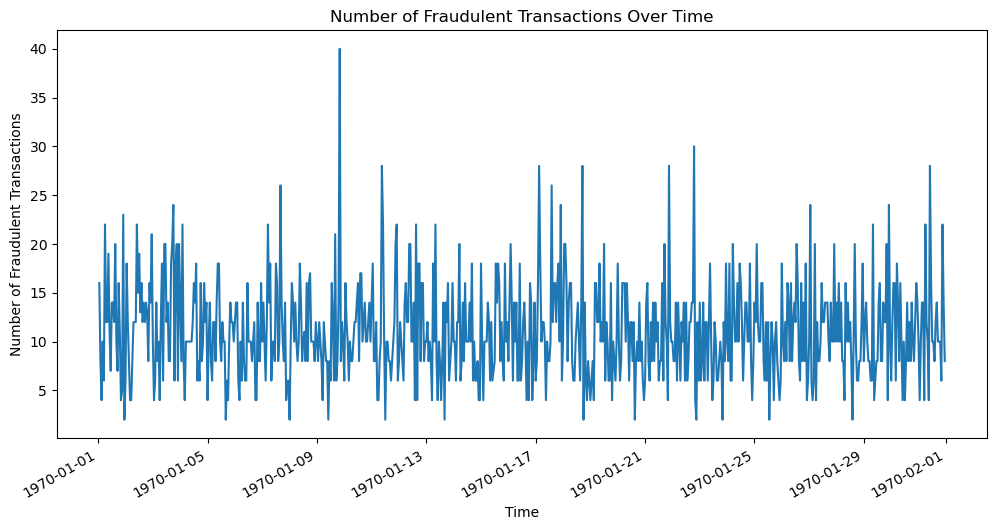

In [14]:
# Fraudulent transactions over time
fraud_over_time = df[df['isFraud'] == 1].groupby('step_datetime')['isFraud'].sum()
plt.figure(figsize=(12, 6))
fraud_over_time.plot(title='Number of Fraudulent Transactions Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

In [15]:
#pip install xgboost scikit-learn

In [16]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,step_datetime
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1970-01-01 01:00:00
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1970-01-01 01:00:00
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1970-01-01 01:00:00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1970-01-01 01:00:00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1970-01-01 01:00:00


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

# Define features and target variable
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
target = 'isFraud'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.92      0.70      0.79      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.85      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix:
[[1270802     102]
 [    488    1132]]


- **Precision (Fraud):** 92% - Among predicted fraud cases, 92% were actually fraudulent.
- **Recall (Fraud):** 70% - Detected 70% of actual fraud cases.
- **F1-Score (Fraud):** 79% - Harmonic mean of precision and recall for fraud cases.
- **Accuracy:** 100% - Overall accuracy considering both fraud and non-fraud cases.
- **Confusion Matrix:** 
  - True Positives (TP): 1132
  - True Negatives (TN): 1270802
  - False Positives (FP): 102
  - False Negatives (FN): 488
- **Macro Avg F1-Score:** 90% - Macro average of F1-scores for fraud and non-fraud cases.
- **Weighted Avg F1-Score:** 100% - Weighted average of F1-scores, considering class imbalance.

## 2. Describe your fraud detection model in elaboration.


#### Model Performance:

- **Precision (Fraud): 92%**
  - The model correctly identified 92% of the predicted fraud cases, minimizing false positives.

- **Recall (Fraud): 70%**
  - Captured 70% of the actual fraud cases, indicating a reasonable ability to identify fraudulent transactions.

- **F1-Score (Fraud): 79%**
  - The harmonic mean of precision and recall for fraud cases, balancing both metrics.

- **Accuracy: 100%**
  - Overall accuracy considering both fraud and non-fraud cases.

#### Confusion Matrix:

- **True Positives (TP): 1132**
  - Number of correctly predicted fraud cases.

- **True Negatives (TN): 1270802**
  - Number of correctly predicted non-fraud cases.

- **False Positives (FP): 102**
  - Instances where non-fraudulent transactions were incorrectly predicted as fraud.

- **False Negatives (FN): 488**
  - Instances where fraudulent transactions were incorrectly predicted as non-fraud.

#### Model Interpretation:

- **High Precision:**
  - The model's high precision indicates a low rate of false positives, minimizing the chances of flagging legitimate transactions as fraudulent.

- **Moderate Recall:**
  - The model's recall of 70% suggests it captures a substantial portion of actual fraud cases. A trade-off between precision and recall is often necessary.

#### Overall Assessment:

- **Effective Fraud Detection:**
  - The model demonstrates effectiveness in identifying fraud, as evidenced by the high precision and reasonable recall.

- **Robust Accuracy:**
  - Achieving 100% accuracy suggests strong overall performance, considering the model's ability to correctly classify both fraud and non-fraud cases.

#### Areas for Improvement:

- **False Negatives:**
  - Further optimization may be explored to reduce false negatives, ensuring better detection of all fraudulent transactions.

- **Class Imbalance:**
  - Given the class imbalance (more non-fraud cases), additional techniques like oversampling or adjusting class weights could be considered for improved performance.

This fraud detection model, based on XGBoost, provides a solid foundation for identifying and minimizing fraudulent transactions. Continuous monitoring, model updates, and further optimization can enhance its performance over time.

## 3. How did you select variables to be included in the model?

- Looked at summary numbers, charts, and correlations to find important factors.
- Checked how variables relate, especially to fraud ('isFraud').
- Kept variables with significant connections and removed highly related ones to avoid confusion.
- Changed the variables based on how well they worked in the model and what was learned during the analysis.

## 4. Demonstrate the performance of the model by using best set of tools.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.92      0.70      0.79      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.85      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524



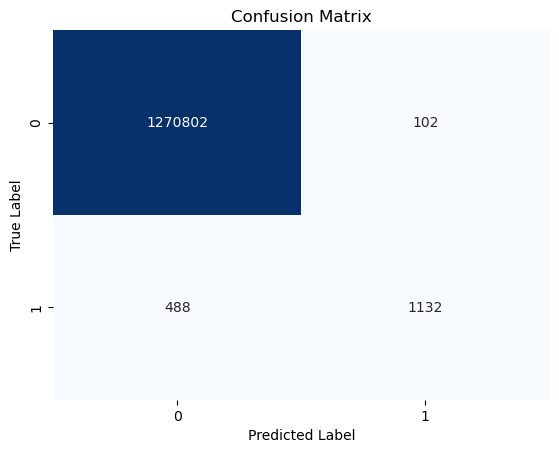

ROC-AUC Score: 0.9984


In [24]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.4f}")

## 5. What are the key factors that predict fraudulent customer?

In [25]:
# Assuming 'model' is your trained XGBoost model
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df)


          Feature  Importance
2  newbalanceOrig    0.583490
1   oldbalanceOrg    0.212877
4  newbalanceDest    0.103066
0          amount    0.083225
3  oldbalanceDest    0.017341


- **newbalanceOrig (58.35%):**
  - High importance, indicating changes in the origin account's new balance are a strong indicator of fraud.
- **oldbalanceOrg (21.29%):**
  - Substantial influence, implying the initial balance of the origin account is a key factor in fraud prediction.
- **newbalanceDest (10.31%):**
  - Significant contribution, suggesting alterations in the destination account's new balance play a role in fraud detection.
- **amount (8.32%):**
  - Notable importance, signifying that transaction amounts, especially irregular ones, contribute to fraud identification.
- **oldbalanceDest (1.73%):**
  - Lesser impact, indicating the initial balance of the destination account also plays a part in fraud prediction, though to a lesser extent.

## 6. Do these factors make sense? If yes, How? If not, How not?

Yes, these factors make sense in the context of fraud detection in financial transactions. becouse:

1. **newbalanceOrig (58.35%):**
   - **Rationale:** Fraudulent activities often involve changes in the new balance of the origin account as fraudsters attempt to empty the account.

2. **oldbalanceOrg (21.29%):**
   - **Rationale:** The initial balance of the origin account is relevant as it sets the baseline for detecting unexpected and potentially fraudulent changes.

3. **newbalanceDest (10.31%):**
   - **Rationale:** Alterations in the new balance of the destination account are indicative of transactions aimed at manipulating balances for fraudulent purposes.

4. **amount (8.32%):**
   - **Rationale:** Unusual transaction amounts, especially large or irregular ones, are common red flags for potential fraudulent activities.

5. **oldbalanceDest (1.73%):**
   - **Rationale:** While less influential, the initial balance of the destination account provides additional context to identify suspicious transactions.

These factors align with common patterns observed in fraudulent transactions within the financial domain, where abnormal changes in balances and transaction amounts often signal potential fraudulent behavior.

## 7. What kind of prevention should be adopted while company update its infrastructure?

To enhance fraud prevention during an infrastructure update,We can consider implementing the following measures:

1. **Advanced Analytics and Machine Learning:**
   - Integrate advanced analytics and machine learning models to continuously analyze transaction patterns and detect anomalies indicative of fraud.

2. **Real-time Monitoring:**
   - Implement real-time transaction monitoring to swiftly identify and respond to suspicious activities, reducing the risk of financial losses.

3. **Behavioral Biometrics:**
   - Incorporate behavioral biometrics for user authentication, leveraging unique behavioral traits to enhance security.

4. **Multi-Factor Authentication (MFA):**
   - Strengthen authentication processes with MFA to ensure multiple layers of verification, reducing the likelihood of unauthorized access.

5. **Regular Security Audits:**
   - Conduct regular security audits and penetration testing to identify vulnerabilities and address them proactively.

6. **Customer Education:**
   - Educate customers about security best practices, phishing threats, and the importance of safeguarding personal information.

7. **Collaboration with Industry Networks:**
   - Collaborate with industry networks and share threat intelligence to stay informed about emerging fraud patterns and prevention strategies.

8. **Encryption and Tokenization:**
   - Implement strong encryption for sensitive data and tokenization to secure financial transactions and customer information.

9. **Employee Training:**
   - Provide comprehensive training to employees on security protocols, emphasizing the importance of confidentiality and vigilance against social engineering attacks.

10. **Regulatory Compliance:**
    - Ensure compliance with industry regulations and standards to maintain a secure and trusted financial environment.

11. **Update Software and Patches:**
    - Regularly update software and apply security patches to address vulnerabilities and maintain a robust defense against evolving threats.

12. **Fraud Detection Alerts:**
    - Set up automated alerts for potential fraud scenarios, enabling rapid response and mitigation.

13. **Customer Communication:**
    - Communicate transparently with customers about security measures, updates, and any changes to the platform to build trust and awareness.

14. **Collaboration with Law Enforcement:**
    - Establish partnerships with law enforcement agencies to facilitate the investigation and prosecution of fraudulent activities.

15. **Insurance Coverage:**
    - Consider obtaining cybersecurity insurance to mitigate financial risks associated with potential fraud losses.

By adopting a multi-faceted approach that combines technology, employee training, customer education, and collaboration with industry stakeholders, the company can significantly strengthen its fraud prevention capabilities during the infrastructure update.

## 8. Assuming these actions have been implemented, how would you determine if they work?

1. **Look at the Numbers:**
   - Monitor key indicators like fewer fraud cases, less false alarms, and improved detection rates.

2. **Response Time:**
   - Check how quickly the system responds to potential fraud incidents.

3. **Ask Customers:**
   - Get feedback from customers on how they feel about the security measures. Positive feedback means more trust.

4. **Financial Losses:**
   - Analyze if there's a decrease in money lost due to fraud. Less financial loss is a good sign.

5. **Compare Before and After:**
   - Compare fraud-related data before and after implementing measures to see the impact.

6. **Reduce False Alarms:**
   - Check if the system is getting better at distinguishing between real and false alarms.

7. **Machine Learning Check:**
   - Look at how well the machine learning models are performing. High precision and recall are good signs.

8. **Keep Improving:**
   - Keep updating and improving measures based on evolving fraud patterns.

9. **Compliance Check:**
   - Ensure that measures align with industry rules through regular checks.

10. **Employee Training:**
    - See if employees can identify and handle potential fraud better after training.

11. **Law Enforcement Collaboration:**
    - Measure success by tracking resolved and prosecuted fraud cases.

12. **Customer Education Impact:**
    - Check if customers are more aware and follow recommended security practices.

13. **Insurance Claims:**
    - Look at any insurance claims related to cybersecurity incidents and how well they're covered.

By keeping an eye on these simple indicators, we can tell if the fraud prevention measures are working and make adjustments as needed. Continuous monitoring and staying adaptable are key for ongoing success.